# Homework 1
###### by Mher Movsisyan
---

### 1 Conception questions  
Please provide a brief answer to each question
- What’s the main difference between supervised and unsupervised learning?

Answer:  
In supervised learning, the models receive labels, in unsupervised learning this is not the case.

- Will different initializations for k-means lead to different results?

Answer:  


Yes

- Give a short proof (can be in words but using correct logic) why k-means algorithm will converge in finite number of iterations.

Answer:  
Since there are a finite number of data points, there are a finite number of ways they can be arranged in clusters. Additionally, since we always take a step if it results in a lower objective value, we can only improve and we won't oscillate.

- What is he main difference between k-means and generalized k-means algorithm

Answer:  
k-means assumes euclidian distance, while the generalized version let's you use any distance metric that is valid through the triangle inequality. 

- Consider the following simple graph  
$$
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

Write down the graph Laplacian matrix and find the eigenvectors associated with the zero eigenvalue. Explain how do you find out the number of disconnected clusters in graph and identify these disconnected clusters using these eigenvectors.

Answer:  
$$ 
L = \begin{bmatrix}
2 & -1 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
-1 & -1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
$$  

$$ \text{Subtracting a (scalar * Identity)} $$
$$ \downarrow $$

$$ 
\begin{bmatrix}
2 - \lambda & -1 & -1 & 0 & 0 \\
-1 & 2 - \lambda & -1 & 0 & 0 \\
-1 & -1 & 2 - \lambda & 0 & 0 \\
0 & 0 & 0 & 1 - \lambda & -1 \\
0 & 0 & 0 & -1 & 1 - \lambda
\end{bmatrix}
$$  



$$ \begin{align*}det(L - (\lambda I)) &= 0 = \\
&= (1 - \lambda)\begin{vmatrix}
2 - \lambda & -1 & -1 & 0 \\
-1 & 2 - \lambda & -1 & 0 \\
-1 & -1 & 2 - \lambda & 0 \\
0 & 0 & 0 & 1 - \lambda
\end{vmatrix} +  \begin{vmatrix}
2 - \lambda & -1 & -1 & 0 \\
-1 & 2 - \lambda & -1 & 0 \\
-1 & -1 & 2 - \lambda & 0 \\
0 & 0 & 0 & -1 
\end{vmatrix} \\
&= (1 - \lambda)((1 - \lambda)\begin{vmatrix}
2 - \lambda & -1 & -1 \\
-1 & 2 - \lambda & -1 \\
-1 & -1 & 2 - \lambda \\
\end{vmatrix}) - \begin{vmatrix}
2 - \lambda & -1 & -1 \\
-1 & 2 - \lambda & -1 \\
-1 & -1 & 2 - \lambda 
\end{vmatrix} \\
&= (1 - \lambda)(1 - \lambda)((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) - ((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) \\
&= ((1 - \lambda)(1 - \lambda) - 1)((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) \\
&= (- 2\lambda + \lambda^2)(-\lambda^3 + 6\lambda^2 -9\lambda) \\
&= \lambda(\lambda - 2)(\lambda - 3)(\lambda - 3)\lambda
\end{align*} $$

$$ \lambda = 1;\ \ \ \ \lambda = 2;\ \ \ \ \lambda = 0; $$

- $ \lambda = 0 $  
$$ \begin{bmatrix}
2 & -1 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
-1 & -1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & -1  \\
0 & 0 & 0 & -1 & 1 
\end{bmatrix}
$$

$$ x_4 = x_5 $$
$$ \begin{bmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{bmatrix} \overset{R_2 * 2; \ \ \ \ R_3 * 2}{\rightarrow} 
\begin{bmatrix}
2 & -1 & -1 \\
-2 & 4 & -2 \\
-2 & -2 & 4 \\
\end{bmatrix} \overset{R_2 + R_1;\ \ \ \ R_3 + R_1}{\rightarrow} 
\begin{bmatrix}
2 & -1 & -1 \\
0 & 3 & -3 \\
0 & -3 & 3 \\
\end{bmatrix}
$$

$$ x_1 = 2x_2; x_2 = x_3 $$

$$ E_{\lambda=0} = \left\{ \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\
x_5 \end{bmatrix} = a\begin{bmatrix} 2 \\ 1 \\ 1 \\ 0 \\
0 \end{bmatrix} + b\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\
1 \end{bmatrix} \right\} $$

We see two disconnected graphs because the eigenvector of $ \lambda = 0 $ can be expressed through two coordinates (`a` and `b`).

### 2: Image compression using clustering  

In this programming assignment, you are going to apply clustering algorithms for image compression. Your task is implementing K-means for this purpose. It is required you implementing the algorithms yourself rather than calling k-means from a package. However, it is ok to use standard packages such as file i/o, linear algebra, and visualization.

##### Formatting instruction

Input  
- `pixels`: the input image representation. Each row contains one data point (pixel). For image dataset, it contains 3 columns, each column corresponding to Red, Green, and Blue component. Each component has an integer value between 0 and 255.  
- `k`: the number of desired clusters. Too high value of K may result in empty cluster error. Then, you need to reduce it.  

Output  
- `class`: cluster assignment of each data point in pixels. The assignment should be 1, 2, 3, etc. For k = 5, for example, each cell of class should be either 1, 2, 3, 4, or 5. The output should be a column vector with size(pixels, 1) elements.
- `centroid`: location of k centroids (or representatives) in your result. With images, each centroid corresponds to the representative color of each cluster. The output should be a matrix with K rows and 3 columns. The range of values should be [0, 255], possibly floating point numbers

Answer:  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed = 173

def distance_euclidian(x, y):
    return np.sqrt(np.sum(np.square(x - y), axis=1))

def distance_manhattan(x, y):
    return np.sum(np.absolute(x - y), axis=1)


def k_means(pixels, k, seed=seed, distance=distance_euclidian):
    """Input  
    `pixels`: the input image representation. Each row contains one data point (pixel). 
        For image dataset, it contains 3 columns, each column corresponding to Red, 
        Green, and Blue component. Each component has an integer value between 0 and 255.  
    `k`: the number of desired clusters. Too high value of K may result in empty cluster 
        error. Then, you need to reduce it.  
    `seed`: random seed to feed to the pseudo-random number generator.  

    Output  
    `classes`: cluster assignment of each data point in pixels. The assignment should be 
        1, 2, 3, etc. For k = 5, for example, each cell of class should be either 1, 
        2, 3, 4, or 5. The output should be a column vector with size(pixels, 1) elements.
    `centroids`: location of k centroids (or representatives) in your result. With images, 
        each centroid corresponds to the representative color of each cluster. The output 
        should be a matrix with K rows and 3 columns. The range of values should be 
        [0, 255], possibly floating point numbers"""
        
    assert k <= 25500, "Too high of a `k`. Try with less clusters"
    assert pixels.shape[1] == 3, "Columns must represent the RGB schema"
    np.random.seed(seed)
    finished = False
    
    # First iteration, generate random cluster centers
    centroids = np.random.randint(low=0, high=255, size=(k, 3), dtype="int")
    classes = np.zeros((pixels.shape[0],), dtype="int") # to clarify scope
    
    # Memory-intensive but fast assuming k << n
    i = 0
    while not finished:
        i += 1
        distances = np.zeros((pixels.shape[0], k), dtype="int")
        
        # calculating distances
        for cluster in range(k):
            dist = distance(pixels, centroids[cluster])
            distances[:, cluster] = dist
            
        # assigning clusters
        classes = np.argmin(distances, axis=1)
        
        old_centroids = centroids.copy()
        # calculate new cluster centers
        for cluster in range(k):
            cluster_points = classes == cluster
            centroids[cluster] = np.mean(pixels[cluster_points], axis=0)
            
        # check if clusters didn't change
        if (old_centroids == centroids).all():
            finished = True
            print(f"Converged in {i} iterations")
    
    return classes, centroids

k_means(np.random.randint(0, 255, (10000, 3)), 5)[1]

Converged in 38 iterations


array([[186,  65, 193],
       [ 65, 175,  58],
       [ 55, 121, 187],
       [148,  59,  57],
       [188, 200, 136]])

#### Hand-in  
Both of your code and report will be evaluated. Upload them together as a zip file. In your report, answer to the following questions:  
1. Use k-means with squared-$ l_2 $ norm as a metric, for `GeorgiaTech.bmp` and `football.bmp` and also choose a third picture of your own to work on. We recommend size of 320 × 240 or smaller. Run your k-means implementation with these pictures, with several different k = 2, 4, 8, 16. Run your k-means implementation (with squared-$ l_2 $ norm) with random initialization centroids. Please try multiple time and report the best one (in terms of the image quality). Please write in your report, how long does it take to converge for each k (report the number of iterations) and also include the resulted compressed pictures for each k.  

Answer:  
Here are the original images:  
<img src="data/GeorgiaTech.bmp" width=250/> <img src="data/football.bmp" width=250/> <img src="data/biz_card.bmp" width=250/>

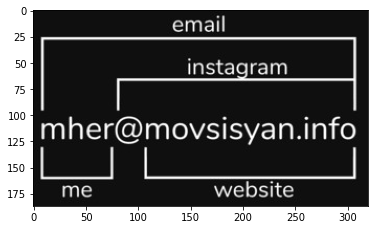

In [24]:
from PIL import Image

inputs = [np.array(Image.open(f'data\{i}')) for i in ["GeorgiaTech.bmp", "football.bmp", "biz_card.jpg"]]

plt.imshow(inputs[2], cmap="gray");

In [ ]:
for k in [2, 4, 8, 16, 32]:
    print(f"Running {k}-means")
    for image in inputs:
        classes, centroids = kmeans(np.reshape(image, (255, 3)), k)
        reconstructed_image = [centroids[c] for c in ]


2. Now try your k-means with the Manhattan distance (or $ l_1 $ distance) and repeat the same steps in Part (1). Please note that the assignment of data point should be based on the Manhattan distance, and the cluster centroid (by minimizing the sum of deviance – as a result o fusing the Manhattan distance) will be taken as the “median” of each cluster. Comment on the difference of image compression results using the two methods.
#### Note  
- You may see some error message about empty clusters when you use too large k. Your implementation should treat this exception as well. That is, do not terminate even if you have an empty cluster, but use smaller number of clusters in that case.  
- We recommend you to test your code with several different pictures so that you can detect some problems that might happen occasionally.  
- If we detect copy from any other student’s code or from the web, you will not be eligible for any credit for the entire homework, not just for the programming part. Also, directly calling built-in functions or from other package functions is not allowed.  